## Analysis on macrame products on an online ecommerce platform

This report is about an analysis around macrame products on an ecommerce platform. The aim of this analysis was to bring insights on whether or not should the client invest time and money on the development of macrame jewelry aswell as to give her more information on what would be the less risky path (and most lucrative one) to take in case there were a good opportunity in this niche.

The source of the data was a famous ecommerce platform for artist that make and sell their own stuff; needless to say that the journey on this regards was not smooth mainly because this platform doesn't provide an API for the really good stuff (it does have an API), so the solution here was to scrape the data.

The platform gave more then 400,000 results for macrame, there was no way I could grab all those listings (mainly because the requested are blocked after _n_ tries) and make it in time for delivery so I decided to go for the way of population sample and randomly picking product links.

After getting a decent number of products I begin to check the data and notice that that type of information was not enough but the shop's data would make a good complement, so I start grabing this.


Was found 3 main categories for macrame products and several other categories that are really too small in terms of quantities and sales

1. Decoration
2. Jewelry
3. Materias and Tools
4. Other

In [617]:
import numpy as np
import pandas as pd
import time
import sys
import re
from matplotlib import pyplot as plt
import scipy.stats as stats
import locale
from scipy.stats import zscore
import seaborn as sns

In [618]:
%matplotlib inline
plt.style.use('ggplot')

In [13]:
shops = pd.read_csv('data_finale/macrame_sellers_list_v3.csv')
products = pd.read_csv('data_finale/macrame_product_list_v3.csv')

In [14]:
del shops['Unnamed: 0']
del products['Unnamed: 0']

In [15]:
shops.head()

,seller,sales,shop_since,rating,favorers,listings,categories,macrame_products,years_in_business,items_sold_per_year,...,sample_listed_products,jewelry_products_profits,decoration_products_profits,material_products_profits,jewelry_products_quantities,decoration_products_quantities,material_products_quantities,decoration_products_sold_per_year,jewelry_products_sold_per_year,material_products_sold_per_year
0,HomeStoriesStore,110,2018,5.0000,78,7,3,7,1,110.0,...,2.0,0.0,1.804165e+06,1.804165e+06,0.0,0.142857,0.142857,15.714286,0.0,15.714286
1,WallKnot,7260,2015,4.9712,8705,781,18,686,4,1815.0,...,173.0,0.0,2.841374e+08,3.323245e+06,0.0,0.218950,0.002561,397.394366,0.0,4.647887
2,FoliageandFlotsam,453,2016,4.9231,282,39,4,30,3,151.0,...,13.0,0.0,8.508117e+06,0.000000e+00,0.0,0.333333,0.000000,50.333333,0.0,0.000000
3,ReformFibers,17304,2014,4.9071,8095,52,4,52,5,3460.8,...,47.0,0.0,1.042956e+07,8.760828e+07,0.0,0.096154,0.807692,332.769231,0.0,2795.261538
4,CloudyMtnMacrame,611,2018,4.9779,594,65,7,66,1,611.0,...,22.0,0.0,8.605504e+07,8.605504e+06,0.0,0.307692,0.030769,188.000000,0.0,18.800000


In [8]:
shops.describe()

,sales,shop_since,rating,favorers,listings,categories,macrame_products,years_in_business,items_sold_per_year,items_sold_per_month,...,sample_listed_products,jewelry_products_profits,decoration_products_profits,material_products_profits,jewelry_products_quantities,decoration_products_quantities,material_products_quantities,decoration_products_sold_per_year,jewelry_products_sold_per_year,material_products_sold_per_year
count,481.000000,481.000000,481.000000,481.000000,481.00000,481.000000,481.000000,481.000000,481.000000,481.000000,...,481.000000,4.810000e+02,4.810000e+02,4.810000e+02,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000
mean,2568.939709,2015.407484,4.301762,1068.744283,299.08316,6.912682,72.372141,3.592516,538.689317,44.934955,...,13.600832,7.540773e+05,5.508784e+06,3.462224e+06,0.006951,0.120682,0.071068,10.204007,7.429267,48.488189
std,10213.676025,2.795135,1.674030,2026.896071,1034.16611,5.542700,165.186210,2.795135,2222.835074,185.226507,...,34.007149,4.401092e+06,3.855871e+07,1.427282e+07,0.029974,0.217787,0.170157,41.092309,83.722360,341.333193
min,0.000000,2006.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,2014.000000,4.880000,36.000000,20.00000,2.000000,10.000000,1.000000,11.000000,0.979167,...,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,146.000000,2016.000000,4.986800,220.000000,53.00000,6.000000,25.000000,3.000000,60.000000,5.000000,...,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1214.000000,2018.000000,5.000000,1041.000000,144.00000,10.000000,62.000000,5.000000,299.800000,24.983333,...,12.000000,0.000000e+00,9.229514e+05,5.895347e+05,0.000000,0.125000,0.037594,2.392857,0.000000,8.571429
max,168248.000000,2019.000000,5.000000,15203.000000,15344.00000,21.000000,1572.000000,13.000000,33649.600000,2804.133333,...,419.000000,6.742787e+07,7.146471e+08,1.676284e+08,0.377301,1.000000,1.222222,472.150235,1357.042507,6402.782609


In [354]:
shops['macrame_products_sales_per_month'].std()

38013.74959601992

In [366]:
shops['macrame_products_sales_per_month'].nlargest(400).skew()

12.096554195944805

In [7]:
products.head()

,listing_id,listed_on,price,region,favorers,seller,bestseller,categories,made_to_order,digital_product,link,is_wall_hanging,jewelry,materials,decoration,tutorial,others
0,659432457.0,2019-01-18,397.61,Desde Rusia,922.0,HomeStoriesStore,False,"['Hogar y decoración', 'Decoración del hogar',...",0.0,0.0,https://www.etsy.com/mx/listing/659432457/feat...,False,0,0,1,0,0.0
1,616510744.0,2019-01-19,1357.33,Desde Turquía,913.0,WallKnot,True,"['Hogar y decoración', 'Decoración del hogar',...",0.0,0.0,https://www.etsy.com/mx/listing/616510744/hoja...,True,0,0,1,0,0.0
2,466609941.0,2019-01-18,503.86,Desde Turquía,11223.0,WallKnot,True,"['Hogar y decoración', 'Decoración del hogar',...",0.0,0.0,https://www.etsy.com/mx/listing/466609941/macr...,True,0,0,1,0,0.0
3,663919819.0,2019-01-19,1028.28,Desde Turquía,557.0,WallKnot,False,"['Hogar y decoración', 'Decoración del hogar',...",0.0,0.0,https://www.etsy.com/mx/listing/663919819/larg...,True,0,0,1,0,0.0
4,502761444.0,2019-01-18,99.20,NaN,3407.0,ReformFibers,True,"['Herramientas y materiales para artesanía', '...",0.0,0.0,https://www.etsy.com/mx/listing/502761444/macr...,False,0,0,0,1,0.0


In [8]:
products.describe()

,listing_id,price,favorers,made_to_order,digital_product,jewelry,materials,decoration,tutorial,others
count,1.190100e+04,11899.000000,9765.000000,11901.0,11901.000000,11905.000000,11905.000000,11905.000000,11905.000000,11905.000000
mean,5.609505e+08,927.268354,72.987506,0.0,0.001260,0.058715,0.212936,0.469467,0.230491,0.061235
std,1.372223e+08,2016.580385,301.777755,0.0,0.035481,0.235100,0.409400,0.499088,0.421165,0.239771
min,3.139335e+07,3.980000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.415630e+08,128.530000,5.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.073457e+08,451.470000,13.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.470290e+08,994.040000,40.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6.841218e+08,65606.360000,11223.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:

products = products.dropna()

In [189]:
#products[['listing_id', 'jewelry','materials', 'decoration', 'tutorial', 'others']]


def getCategory(ind, item_list):
    if(item_list.iloc[ind]['materials'] == 1):
        return 'material'
    elif(item_list.iloc[ind]['tutorial'] == 1):
        return 'tutorial'
    elif(item_list.iloc[ind]['decoration'] == 1):
        return 'decoration'
    elif(item_list.iloc[ind]['others'] == 1):
        return 'other'
    else:
        return 'jewelry'

products['product_categories'] = [getCategory(ind, products) for ind,_ in enumerate(products['price'])]



/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


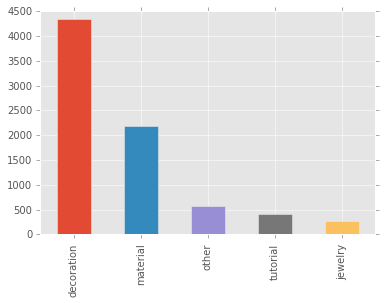

In [194]:
products['product_categories'].value_counts().plot.bar()

It might be the niche is over saturated of wall hanging offers

Text(0, 0.5, 'Number of products')

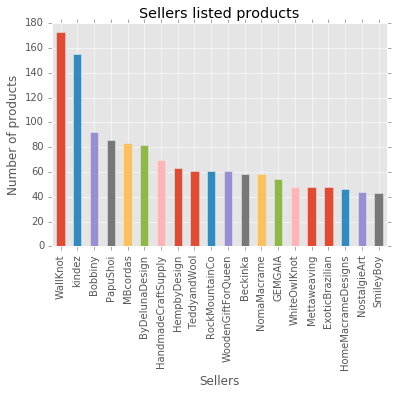

In [222]:
ax = products['seller'].value_counts().nlargest(20).plot.bar(title="Sellers listed products")

ax.set_xlabel("Sellers")
ax.set_ylabel("Number of products")

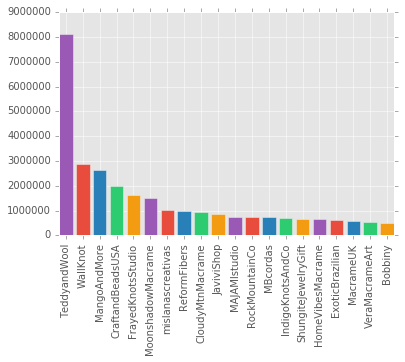

In [252]:
top_sellers = shops[['seller', 'macrame_products_sales_per_year']].sort_values('macrame_products_sales_per_year',ascending=False)
my_colors = ['#9b59b6','#e74c3c', '#2980b9' , '#2ecc71', '#f39c12']

plt.bar(top_sellers['seller'][:20], top_sellers['macrame_products_sales_per_year'][:20], color=my_colors)
plt.title('')
plt.xticks(rotation=90)

plt.show()


Text(0, 0.5, 'Number of Sellers')

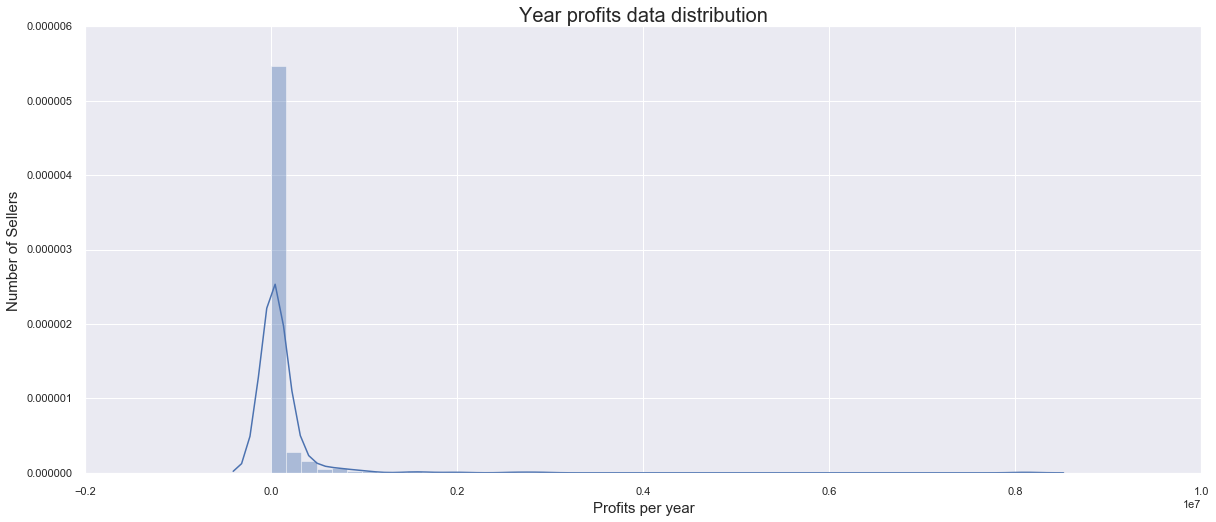

In [660]:
year_sales = shops[shops['macrame_products_sales_per_year'] > 0].dropna()
B = sns.distplot(year_sales['macrame_products_sales_per_year'])
B.set_title('Year profits data distribution', fontsize=20)
B.set_xlabel('Profits per year', fontsize=15)
B.set_ylabel('Number of Sellers', fontsize=15)

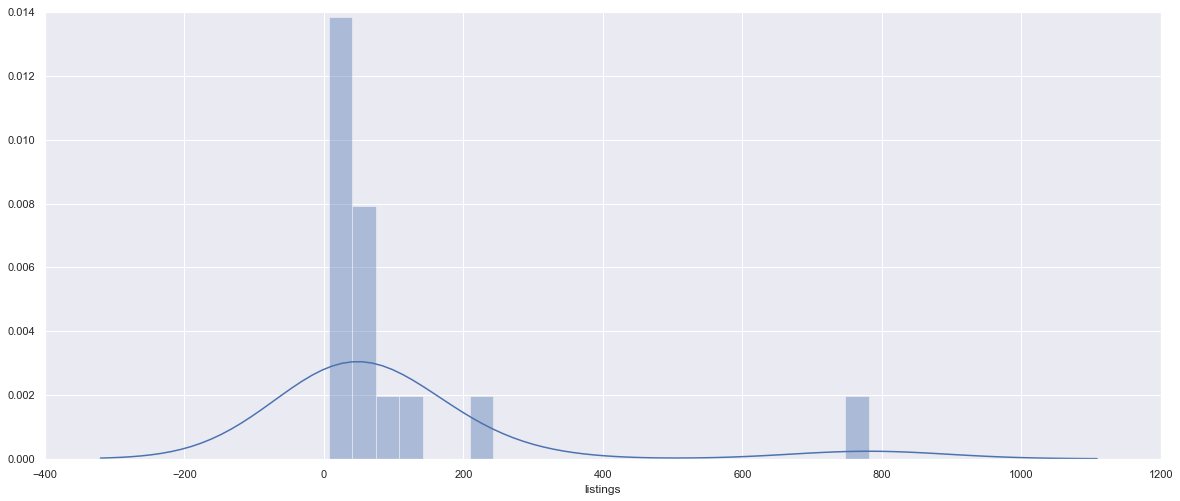

In [399]:
# Removing sellers with no sales at all
year_sales = shops[shops['listings'] > 0].dropna()
sns.set(rc={'figure.figsize':(20,8)})
sns.distplot(year_sales['listings'][:15], )

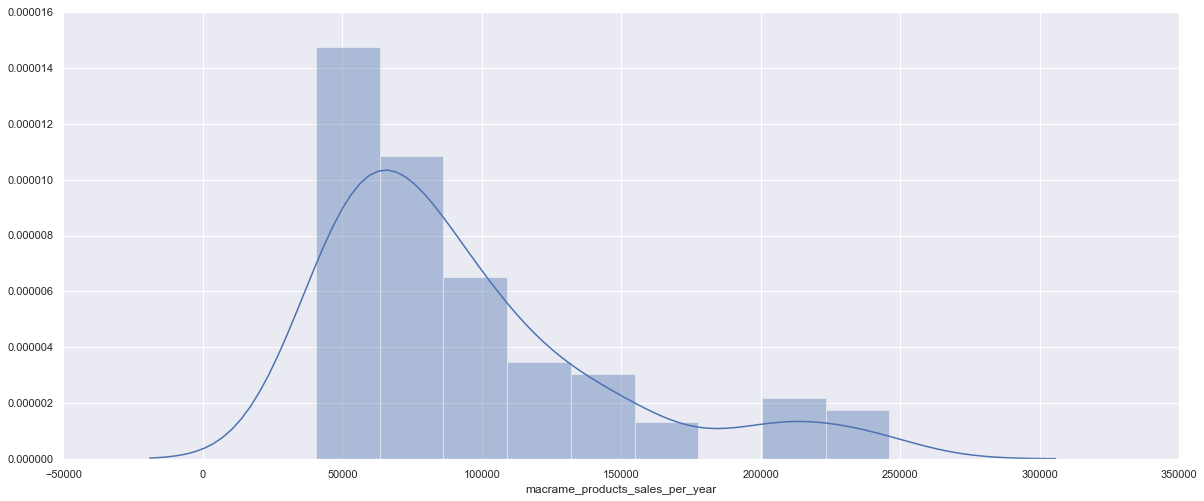

In [422]:
# Getting rid of some sellers that are on ranges not wanted
shop_new = shops[shops['macrame_products_sales_per_year'] < 250000 ]
shop_new = shop_new[shop_new['macrame_products_sales_per_year'] > 40000]
sns.set(rc={'figure.figsize':(20,8)})
sns.distplot(shop_new['macrame_products_sales_per_year'])

Text(0.5, 0, 'Product Sales per Year')

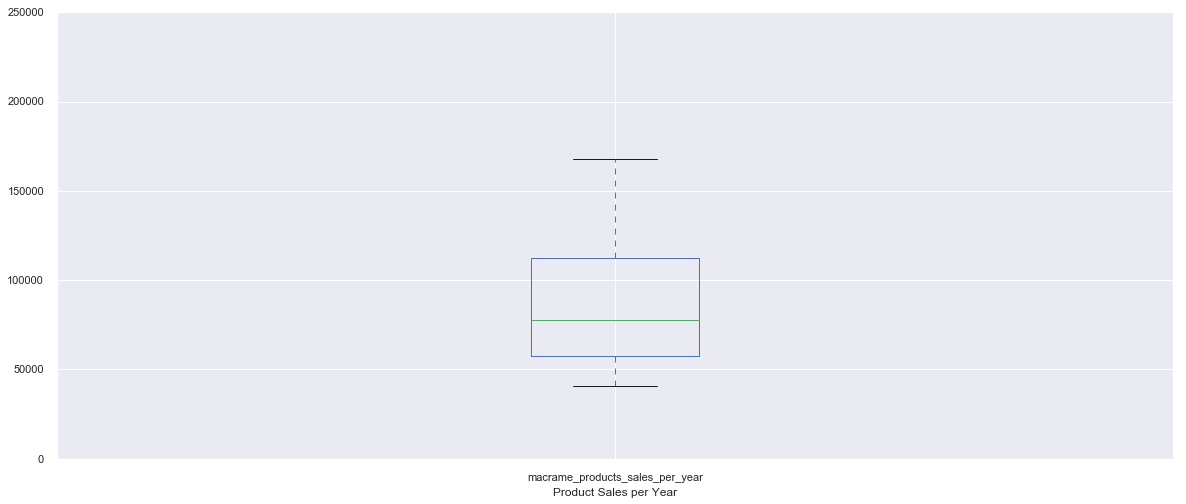

In [667]:
# Boxplot to get an idea on how are the sales distributed

BX = shop_new[['macrame_products_sales_per_year']].plot.box()
BX.set_xlabel('Product Sales per Year')


In [682]:
products.shape

(7793, 18)

In [671]:
shops[shops['macrame_products_sales_per_year'] == 0]

,seller,sales,shop_since,rating,favorers,listings,categories,macrame_products,years_in_business,items_sold_per_year,...,sample_listed_products,jewelry_products_profits,decoration_products_profits,material_products_profits,jewelry_products_quantities,decoration_products_quantities,material_products_quantities,decoration_products_sold_per_year,jewelry_products_sold_per_year,material_products_sold_per_year
141,Dreamcatchersbdesign,0,2016,0.0,4,12,0,10,3,0.0,...,4.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0
147,IyataTreasures,0,2019,0.0,3,2,1,1,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0
167,becausetoday,0,2018,0.0,2,3,1,3,1,0.0,...,3.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0
198,MacrameByAbbie,0,2019,0.0,3,4,0,4,0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0
205,HomeBubble,0,2018,0.0,7,12,0,5,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0
223,BloomandBestow,0,2018,0.0,4,9,1,9,1,0.0,...,7.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.0,0.0,0.0
240,ArtandKnots,0,2018,0.0,6,7,1,7,1,0.0,...,4.0,0.0,0.0,0.0,0.0,0.571429,0.0,0.0,0.0,0.0
256,ElMarieMacrame,0,2019,0.0,18,10,0,10,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
269,WallsAura,0,2018,0.0,9,19,4,14,1,0.0,...,9.0,0.0,0.0,0.0,0.0,0.473684,0.0,0.0,0.0,0.0
272,TheRoyalWeave,0,2018,0.0,3,4,0,4,1,0.0,...,3.0,0.0,0.0,0.0,0.0,0.750000,0.0,0.0,0.0,0.0


Let's take a look to our data and see how well it look.

In [9]:
decoration_yearly_metrics = shops[shops['decoration_products_profits'] > 0]
jewelry_yearly_metrics = shops[shops['jewelry_products_profits']  > 0]
materials_yearly_metrics = shops[shops['material_products_profits'] > 0]

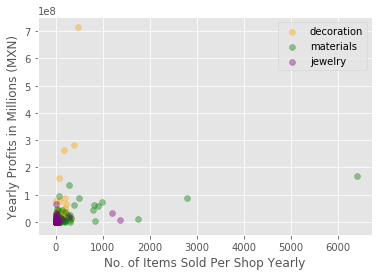

In [10]:
plt.scatter(x=decoration_yearly_metrics['decoration_products_sold_per_year'], y=decoration_yearly_metrics['decoration_products_profits'], alpha=0.4, color="orange")
plt.scatter(x=materials_yearly_metrics['material_products_sold_per_year'], y=materials_yearly_metrics['material_products_profits'], alpha=0.4, color="green")
plt.scatter(x=jewelry_yearly_metrics['jewelry_products_sold_per_year'], y=jewelry_yearly_metrics['jewelry_products_profits'], alpha=0.4, color="purple")


plt.xlabel("No. of Items Sold Per Shop Yearly")
plt.ylabel("Yearly Profits in Millions (MXN)")
plt.legend(labels=['decoration', 'materials', 'jewelry'],loc="best")

plt.show()

In this figure we can see the yearly profits over items sold per year and what we want to get from this is the extremes, the ones that have a lot of products listed but not that great profits compared to the top left dot (over 7 million MXN on sells) which doesn't have too much products listed but it's profits are remarkable (it would be great to know how she does that). 

By now we know that the client can be profitable by listing a few products. I'm sure these products are really expensive.

One thing that bugs me are the extreme outliers, I can't just ignore. Does this outliers have something to do with time (year on the business)?

In [11]:
decoration_years_in_business = shops[shops['decoration_products'] > 1]
decoration_years_in_business = decoration_years_in_business[decoration_years_in_business['jewelry_products'] == 0]
decoration_years_in_business = decoration_years_in_business[decoration_years_in_business['material_products'] < 10]
decoration_years_in_business.head()




,seller,sales,shop_since,rating,favorers,listings,categories,macrame_products,years_in_business,items_sold_per_year,...,sample_listed_products,jewelry_products_profits,decoration_products_profits,material_products_profits,jewelry_products_quantities,decoration_products_quantities,material_products_quantities,decoration_products_sold_per_year,jewelry_products_sold_per_year,material_products_sold_per_year
1,WallKnot,7260,2015,4.9712,8705,781,18,686,4,1815.0,...,173.0,0.0,2.841374e+08,3.323245e+06,0.0,0.218950,0.002561,397.394366,0.0,4.647887
2,FoliageandFlotsam,453,2016,4.9231,282,39,4,30,3,151.0,...,13.0,0.0,8.508117e+06,0.000000e+00,0.0,0.333333,0.000000,50.333333,0.0,0.000000
4,CloudyMtnMacrame,611,2018,4.9779,594,65,7,66,1,611.0,...,22.0,0.0,8.605504e+07,8.605504e+06,0.0,0.307692,0.030769,188.000000,0.0,18.800000
5,MacrameWonderlandAU,521,2018,5.0000,272,50,2,49,1,521.0,...,21.0,0.0,3.630302e+07,0.000000e+00,0.0,0.420000,0.000000,218.820000,0.0,0.000000
6,macratura,19,2018,5.0000,6,21,0,21,1,19.0,...,14.0,0.0,1.024643e+06,0.000000e+00,0.0,0.666667,0.000000,12.666667,0.0,0.000000


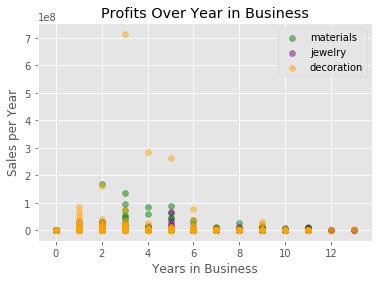

In [12]:
plt.scatter(x=shops['years_in_business'], y=shops['material_products_profits'],alpha=0.5, color="green")
plt.scatter(x=shops['years_in_business'], y=shops['jewelry_products_profits'],alpha=0.5, color="purple")
plt.scatter(x=shops['years_in_business'], y=shops['decoration_products_profits'], alpha=0.5, color="orange")

plt.xlabel("Years in Business")
plt.ylabel("Sales per Year")
plt.legend(labels=['materials', 'jewelry','decoration'],loc="best")
plt.title('Profits Over Year in Business')
plt.show()

The more old the shop is doesn't help it sell more, we can still see our ~7 million (MXN) outlier and clearly her store is not that old. 

On the contrary, it seems to be soft tendency that favors newer sellers on their first five or six years.

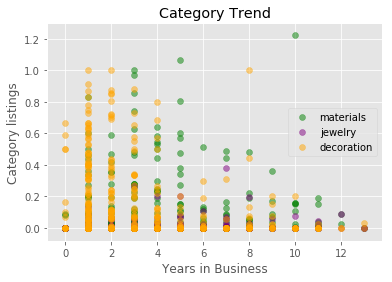

In [13]:
plt.scatter(x=shops['years_in_business'], y=shops['material_products_quantities'],alpha=0.5, color="green")
plt.scatter(x=shops['years_in_business'], y=shops['jewelry_products_quantities'],alpha=0.5, color="purple")
plt.scatter(x=shops['years_in_business'], y=shops['decoration_products_quantities'], alpha=0.5, color="orange")

plt.xlabel("Years in Business")
plt.ylabel("Category listings")
plt.legend(labels=['materials', 'jewelry','decoration'],loc="best")

plt.title('Category Trend')

plt.show()

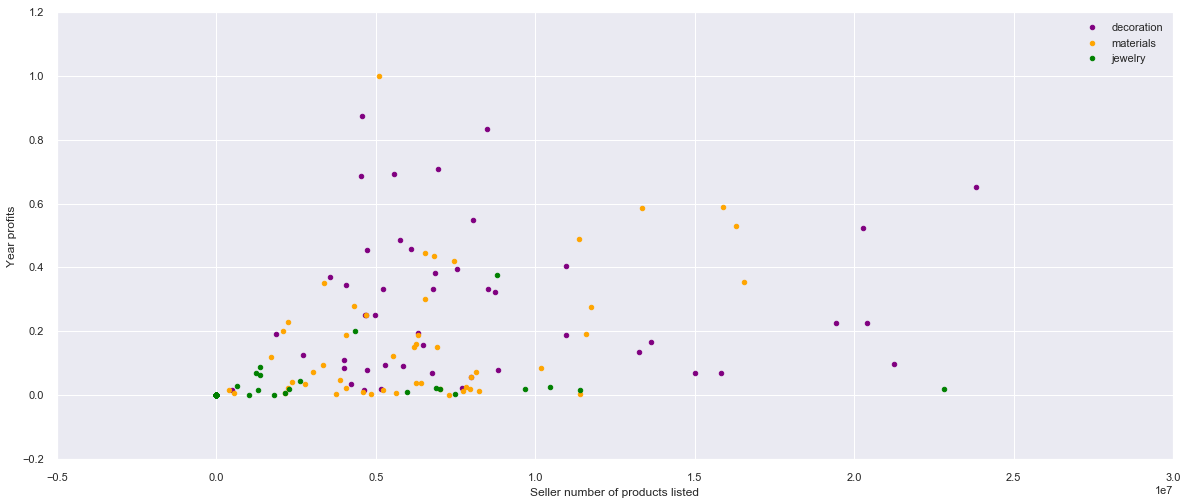

In [695]:
#shops.columns
# 'jewelry_products_profits' 'material_products_profits' ,
plt.scatter(shop_new['decoration_products_profits'], shop_new['decoration_products_quantities'], color="purple")
plt.scatter(shop_new['material_products_profits'], shop_new['material_products_quantities'], color="orange")
plt.scatter(shop_new['jewelry_products_profits'], shop_new['jewelry_products_quantities'], color="green")
plt.xlabel("Seller number of products listed")
plt.ylabel("Year profits")
plt.legend(labels=['decoration','materials', 'jewelry'],loc="best")


2018 seems to had been the year for decoration products, at list this is what the data is showing. Perhaps this trend will continue on 2019 saturating the market so the analysis must continue this year to catch emerging trends

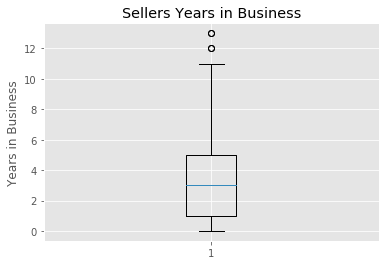

In [15]:
plt.boxplot(x=shops['years_in_business'])
plt.ylabel("Years in Business")
plt.title('Sellers Years in Business')
plt.show()

Most of the sellers have between 1 and 5 years in business, now this make it more clear, there is no favoring for newest sellers, is just that the majority of the shop owners are whithin this range.

### Does price affects the number of people that save the product on their favorites?

It's obvious on some products that the number of favorers are influenced by price but other factors (not taken in account on this analysis) may play an important role and I conclude this because of the massive concentration of points towards 10000 (mexican pesos) and 2000 favorers, indicating other affecting factors, maybe the quality of the pictures or the product itself.

In [16]:
products.head()

,listing_id,listed_on,price,region,favorers,seller,bestseller,categories,made_to_order,digital_product,link,is_wall_hanging,jewelry,materials,decoration,tutorial,others
0,659432457.0,2019-01-18,397.61,Desde Rusia,922.0,HomeStoriesStore,False,"['Hogar y decoración', 'Decoración del hogar',...",0.0,0.0,https://www.etsy.com/mx/listing/659432457/feat...,False,0,0,1,0,0.0
1,616510744.0,2019-01-19,1357.33,Desde Turquía,913.0,WallKnot,True,"['Hogar y decoración', 'Decoración del hogar',...",0.0,0.0,https://www.etsy.com/mx/listing/616510744/hoja...,True,0,0,1,0,0.0
2,466609941.0,2019-01-18,503.86,Desde Turquía,11223.0,WallKnot,True,"['Hogar y decoración', 'Decoración del hogar',...",0.0,0.0,https://www.etsy.com/mx/listing/466609941/macr...,True,0,0,1,0,0.0
3,663919819.0,2019-01-19,1028.28,Desde Turquía,557.0,WallKnot,False,"['Hogar y decoración', 'Decoración del hogar',...",0.0,0.0,https://www.etsy.com/mx/listing/663919819/larg...,True,0,0,1,0,0.0
4,502761444.0,2019-01-18,99.20,NaN,3407.0,ReformFibers,True,"['Herramientas y materiales para artesanía', '...",0.0,0.0,https://www.etsy.com/mx/listing/502761444/macr...,False,0,0,0,1,0.0


In [17]:
jewelry_products = products[products['jewelry'] == 1]
material_products = products[products['materials'] == 1]
decoration_products = products[products['decoration'] == 1]
guides_products = products[products['tutorial'] == 1]
other_products = products[products['others'] == 1]

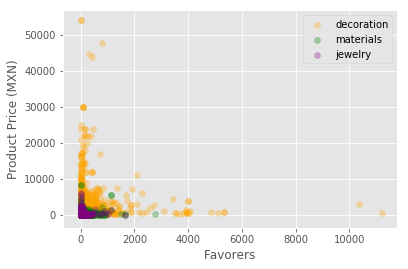

In [18]:
plt.scatter(x=decoration_products['favorers'], y=decoration_products['price'], alpha=0.3, color="orange")
plt.scatter(x=material_products['favorers'], y=material_products['price'], alpha=0.3, color="green")
plt.scatter(x=jewelry_products['favorers'], y=jewelry_products['price'], alpha=0.3, color="purple")
plt.xlabel("Favorers")
plt.ylabel("Product Price (MXN)")
plt.legend(labels=['decoration', 'materials', 'jewelry'],loc="best")
plt.show()

We can get more insightful information from this, and that is that people likes decoration items a lot better then jewelry but the spread of the data is somwhat deceitful because if you look closer you will notice that the concentration happens on a range from zero to one thousand (more or less)

In [19]:
product_category_by_seller = products.groupby(['seller'])['jewelry', 'materials','decoration','tutorial','others'].sum()

In [20]:
jewelry_total =  product_category_by_seller['jewelry'].sum()
materials_total =  product_category_by_seller['materials'].sum()
decoration_total =  product_category_by_seller['decoration'].sum()
tutorial_total =  product_category_by_seller['tutorial'].sum()
others_total =  product_category_by_seller['others'].sum()

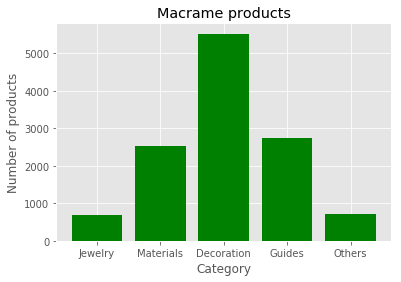

In [21]:
# Visual representation of the category product distribution

x = ['Jewelry', 'Materials', 'Decoration', 'Guides', 'Others']
categories = [jewelry_total, materials_total, decoration_total, tutorial_total, others_total]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos,categories, color="green")
plt.xlabel("Category")
plt.ylabel("Number of products")
plt.title("Macrame products")
plt.xticks(x_pos, x)
plt.show()

Here we can notice that macrame jewelry listings were the less frequent and at this point I begin to think this was so due to a not so profitable niche but I had to find out and probe this.

From this perspective data distribution looks pretty clear.

In [22]:
jewelry_total_earnings = products[products['jewelry'] > 0]['price'].sum()
materials_total_earnings = products[products['materials'] > 0]['price'].sum()
decoration_total_earnings = products[products['decoration'] > 0]['price'].sum()
guides_total_earnings = products[products['tutorial'] > 0]['price'].sum()
others_total_earnings = products[products['others'] > 0]['price'].sum()

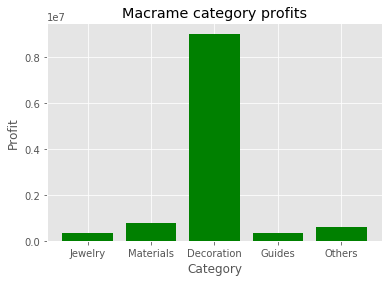

In [23]:
# Visual representation of the category product distribution

x = ['Jewelry', 'Materials', 'Decoration', 'Guides', 'Others']
categories = [jewelry_total_earnings, materials_total_earnings, decoration_total_earnings, guides_total_earnings, others_total_earnings]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos,categories, color="green")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.title("Macrame category profits")
plt.xticks(x_pos, x)
plt.show()

Just as I thought, the income difference from __decoration__ and the others is overwhelming and at this point we got really important news to the client: her niche is not profitable enough, at least not by itself, she will need to come with a strategy the involves other type of products other then just jewerly.

So far so good, well, not for her but I have some other questions I want to answer and one of them is releated to the competition; You may have noticed that both of the previous charts have shown somewhat a similar shape and this lead me to wonder about how easy or hard would be to get into the __macrame decoration__ niche, is it already crowded? For this we need to look at how many sellers are into this niche.

In [24]:
#How many sellers are into each of the categories
product_category_by_seller.head()

,jewelry,materials,decoration,tutorial,others
seller,,,,,
1AnniePotterPresents,0,0,0,1,0.0
23PalominoBoutique,0,0,10,0,0.0
66Playdoor,0,0,2,0,0.0
73SeventyThree,1,0,0,0,0.0
99gems,1,0,0,0,0.0


In [25]:
def getCategorySellers(seller):
    result = product_category_by_seller.loc[seller]
    return [result['jewelry'], result['materials'], result['decoration'],result['tutorial'],result['others']]
    
jewelry_sellers = []
materials_sellers = []
decoration_sellers = []
guides_sellers = []
others_sellers = []

for seller in product_category_by_seller.index:
    result = getCategorySellers(seller)
    if(result[0] > 0):
        jewelry_sellers.append(result[0])
    elif(result[1] > 0):
        materials_sellers.append(result[1])
    elif(result[2] > 0):
        decoration_sellers.append(result[2])
    elif(result[3] > 0):
        guides_sellers.append(result[3])
    elif(result[4] > 0):
        others_sellers.append(result[4])
    

In [26]:
len(jewelry_sellers)

255

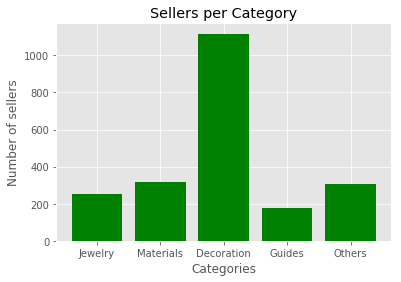

In [27]:
#Sellers per Category
x = ['Jewelry', 'Materials', 'Decoration', 'Guides', 'Others']
sellers_per_category = [ len(jewelry_sellers), len(materials_sellers), len(decoration_sellers), len(guides_sellers), len(others_sellers)]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos,sellers_per_category, color="green")
plt.xlabel("Categories")
plt.ylabel("Number of sellers")
plt.title("Sellers per Category")
plt.xticks(x_pos, x)
plt.show()


We get almost the same shape, at list to notice the dominance of the macrame decoration listings but also we can infer from this chart that getting into this niche will not be easy but maybe it worth the effort though, but let's find some data to validate this position.

First let's look at how profitable really is this niche in comparison with the other niches, for this I decided to compare some of the top sellers for each category.

In [28]:
#List of top decoration product sellers

top_decoration = shops.nlargest(shops.shape[0],'macrame_products_sales_per_year')
top_decoration = top_decoration[top_decoration['decoration_products'] > 0]
top_decoration = top_decoration.nlargest(shops.shape[0], 'decoration_products').nlargest(10, 'macrame_products_sales_per_year')

In [29]:
minimum_decoration_products = top_decoration['decoration_products'].mean()

In [30]:
#List of top jewerly product sellers

top_jewelry = shops.nlargest(shops.shape[0],'macrame_products_sales_per_year')
top_jewelry = top_jewelry[top_jewelry['jewelry_products'] > 0]
top_jewelry = top_jewelry.nlargest(shops.shape[0], 'jewelry_products')
top_jewelry = top_jewelry[top_jewelry['material_products'] == 0]
top_jewelry = top_jewelry.nlargest(20, 'macrame_products_sales_per_year')
print('A good jewelry number to list? ',top_jewelry['jewelry_products'].mean(), '... not a good idea, jewerly items sales are influenced by other type of products')


A good jewelry number to list?  2.05 ... not a good idea, jewerly items sales are influenced by other type of products


In [31]:
#List of top materials product sellers

top_materials = shops.nlargest(shops.shape[0],'macrame_products_sales_per_year')
top_materials = top_materials[top_materials['material_products'] > 0]
top_materials = top_materials.nlargest(shops.shape[0], 'material_products')
top_materials = top_materials[top_materials['decoration_products'] == 0]
top_materials = top_materials[top_materials['jewelry_products'] == 0].nlargest(10,'macrame_products_sales_per_year')
top_materials['material_products'].mean()

24.5

I guess the macrame jewerly sellers had noticed the trend and because of this they are using a mix of products weighted over decoration. 

Often times you will see some categories interlap on some sellers

Also you can see there is not a strong correlation between profit and the number of products per seller, not from certin point and on, but on the lowest level it does affect if the seller has less then a docen items listed.

So, which is the __right number of products__ (the minimum) the client has to list on the platform in order to be "succesful" (not saying it will be if she does this, but is a variable that matters).

For decoration products __34.2__ would be the minimum. On the other hand for jewerly doesn't seems to be good idea to try only this type of items (no matter the quantities), but there are some shops doing very well but after a little bit of indagation (off the data) I realize this sellers had precious stones as the main attractive, the macrame was a secondary material; if you do wanna try jewerly make sure to use some exotic materials, other then just macrame, or you should offer decoration products as well. 

For materials a good number to start is __24.5__ items.

### Well, how profitable... and how competitive?

In [32]:
# For decoration TeddyandWool
top_shop_decoration = shops[shops['seller'] == 'TeddyandWool']
# For materials CraftandBeadsUSA
top_shop_materials = shops[shops['seller'] == 'CraftandBeadsUSA']
# For jewelry ShungiteJewelryGift
top_shop_jewelry = shops[shops['seller'] == 'ShungiteJewelryGift']

In [633]:
plt.figure(figsize=(6, 6))
plt.bar(['categories'],top_shop_decoration['macrame_products_sales_per_year'])
plt.bar(['categories'],top_shop_materials['macrame_products_sales_per_year'])
plt.bar(['categories'],top_shop_jewelry['macrame_products_sales_per_year'])
plt.title('Difference between Top sellers from each category')
plt.ylabel("Profits (MXN)")
plt.legend(labels=['decoration', 'materials', 'jewelry'],loc="best")
plt.show()

NameError: name 'top_shop_decoration' is not defined

<Figure size 432x432 with 0 Axes>

#### What kinds of products are the more promising and less risky?

We want to find a product that can be profitable and has not so much friction

I wanted to provide the client with information regarding the characteristics of profitable sellers so for this I decide to try out a clustering technique using __K Means__

Nothing sorprising in here as I did expected US to have the majority of the listings.

In [39]:
shops['macrame_products_sales_per_year'].max()

8108495.586448085

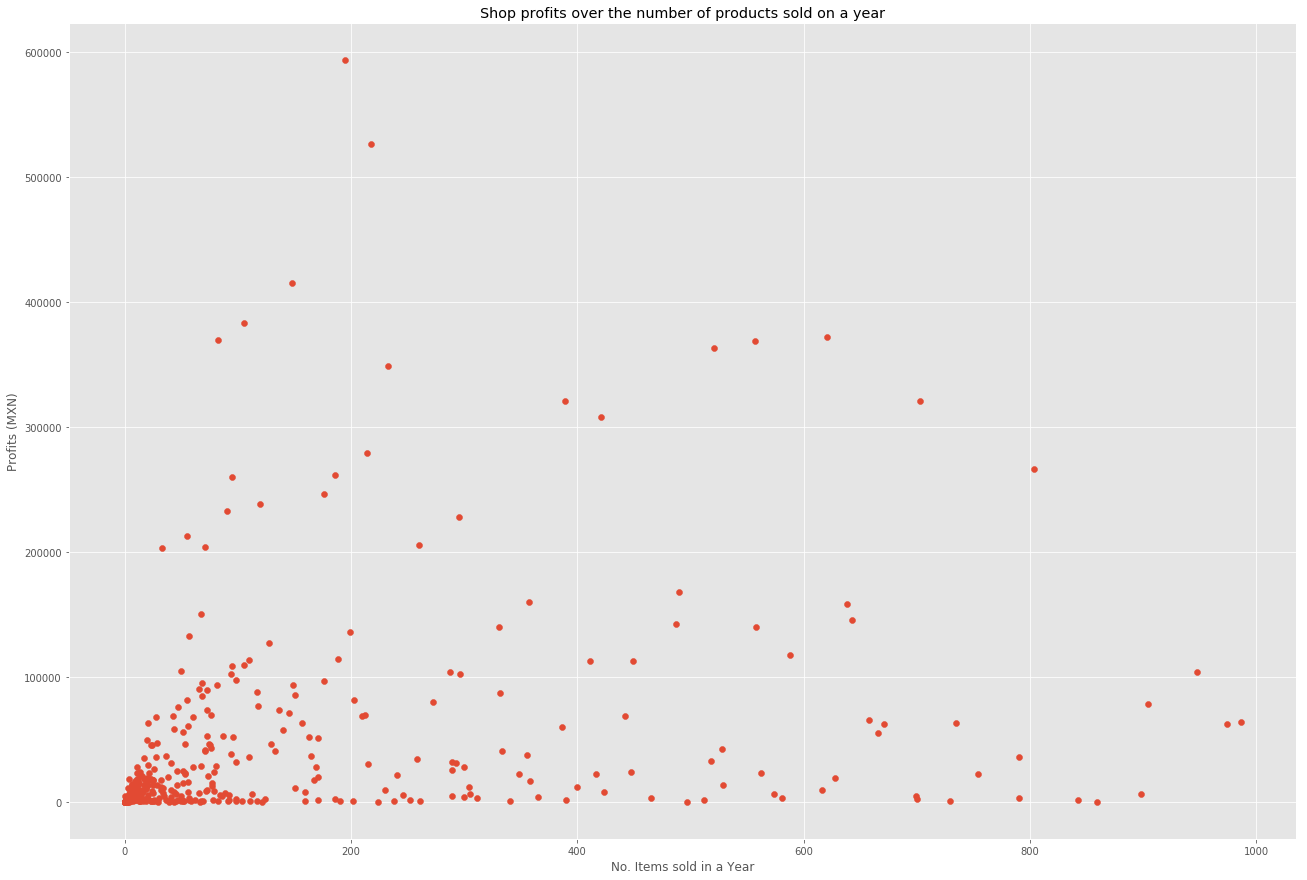

In [40]:
less_then_600_sales = shops[shops['macrame_products_sales_per_year'] < 600000.00]
less_then_600_sales = less_then_600_sales[less_then_600_sales['items_sold_per_year'] < 1000]

plt.figure(figsize=(22,15))
plt.scatter(less_then_600_sales['items_sold_per_year'], less_then_600_sales['macrame_products_sales_per_year'])
plt.xlabel('No. Items sold in a Year')
plt.ylabel('Profits (MXN)')

plt.title('Shop profits over the number of products sold on a year')
plt.show()


This view was norrow down to certain parameters according to the client capacity; she cannot handle more then 40 listings (at list on the firsts months) and she wants a yearly profit  of 200,000 MXN at list  (for the first year). This is also convinient because the data is really spread out (DBSCAN can be used here but... I'll try this later)

In [638]:
df_new = shop_new[['items_sold_per_year', 'macrame_products_sales_per_year']]
df_new = df_new.apply(zscore)

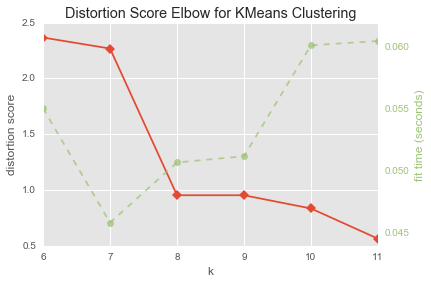

In [642]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(6,12))

visualizer.fit(df_new)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [609]:
from sklearn.cluster import KMeans

In [610]:
k_means = KMeans(init = "k-means++", n_clusters = 8, n_init = 12)

In [643]:
X = df_new.values[:,0:]
k_means.fit(X)
k_means_labels = k_means.labels_

In [644]:
k_means_cluster_centers = k_means.cluster_centers_

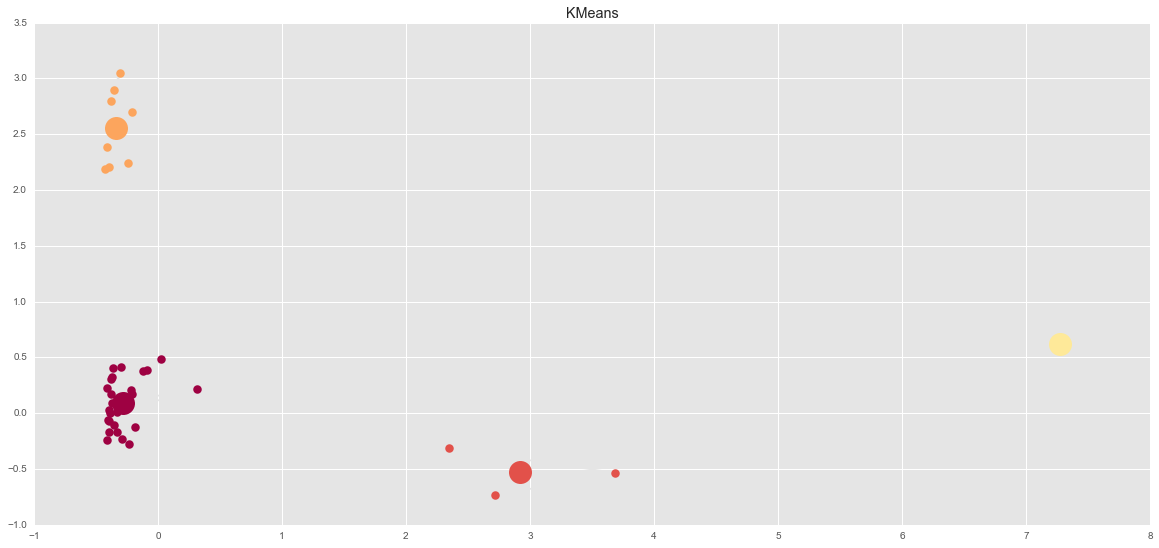

In [646]:


# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(20, 9))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], '#E5E5E5', markerfacecolor=col, marker='.', markersize=17)
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=23)

# Title of the plot
ax.set_title('KMeans')



# Show the plot
plt.show()


items_sold_per_year                4.894721
macrame_products_sales_per_year    1.422851
dtype: float64

No matter how much norrow the view (going towards the bottom left corner) the data still really spread so KMeans is not effective in this situation, I will have to go for the __DBSCAN__, but this on another moment.

In [552]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

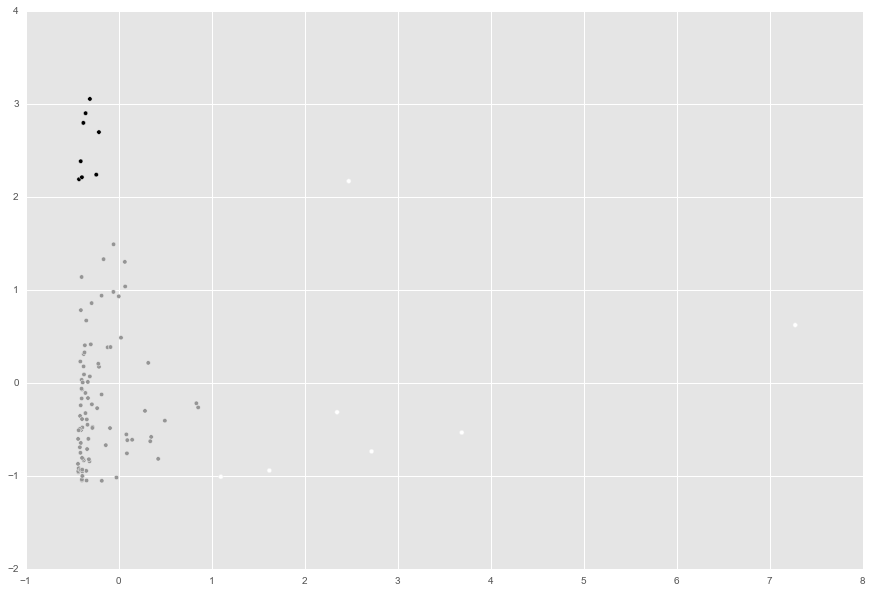

In [631]:
dbscan = DBSCAN().fit_predict(df_new)
plt.figure(figsize=(15,10))
plt.scatter(df_new['items_sold_per_year'], df_new['macrame_products_sales_per_year'], c=dbscan)
plt.show() 

### Conclusion

The client has to be careful if she wants to persuit her intentions on macramé jewelry so the recommendation is to mix her techniques with rocks.

A good path (not without friction) is to start creating and selling decoration products, like __wall hangers__, this can be done as a backup strategy aside from the jewelry; the recommended way is to stick on one or another.

There is a lot of competition on the decoration niche but if the client can create a good marketing strategy she can be profitable; also there is a good think on the number of products that mus be listed in order to get noticed which is really low in comparison with jewelry or materials.

Further analysis must be done with more data from the coming months to catch the trends, also from data on social networks to complement and support this analysis from other perspectives.